In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
!pip install wordcloud
from wordcloud import WordCloud

In [2]:
#http://localhost:8888/edit/Downloads/Acknowledgment.txt

In [3]:
#start

In [6]:
with open('Downloads/iehp105.txt','r')as f:
    text=f.readlines()

In [7]:
text=[line.strip() for line in text]

In [8]:
print(text)

['Sports Training                                                   5', '', '5.1    Introduction', 'We use the term training in various contexts. We talk of training', 'of teachers, administrators, police and army personnel, medical', 'and paramedical functionaries including, working in non-', 'governmental organisations and volunteers engaged in various', 'events. In these contexts, by training we mean, an organised', 'and systematic instructional process which aims at improving', 'an individualsâ€™ ability to play their assigned roles effectively and', 'meaningfully. However, this kind of understanding of the term', 'training cannot be applied to the concept of sports training.', 'The term sports training is specifically used in the context of', 'athletics, sports and games which could be a training of sports', 'persons, coaches and teachers of physical education. It is', 'also used by scientists and experts who belong to the field of', 'sports science and medicine, sports bio-mechan

In [9]:
#join

In [10]:
#let us have a vector of words and apply paste function into it

In [11]:
a=['Hello','World','My','First','Handshake','Through','R']

In [12]:
a

['Hello', 'World', 'My', 'First', 'Handshake', 'Through', 'R']

In [13]:
b=' '.join(a)

In [14]:
b

'Hello World My First Handshake Through R'

In [15]:
#just check how do these two look

In [16]:
a

['Hello', 'World', 'My', 'First', 'Handshake', 'Through', 'R']

In [17]:
b

'Hello World My First Handshake Through R'

In [18]:
#Lets start again

In [19]:
with open('Downloads/iehp105.txt','r')as f:
    chunk_2=f.readlines()

In [20]:
print(chunk_2)

['          Sports Training                                                   5\n', '\n', '                     5.1    Introduction\n', '                     We use the term training in various contexts. We talk of training\n', '                     of teachers, administrators, police and army personnel, medical\n', '                     and paramedical functionaries including, working in non-\n', '                     governmental organisations and volunteers engaged in various\n', '                     events. In these contexts, by training we mean, an organised\n', '                     and systematic instructional process which aims at improving\n', '                     an individualsâ€™ ability to play their assigned roles effectively and\n', '                     meaningfully. However, this kind of understanding of the term\n', '                     training cannot be applied to the concept of sports training.\n', '                     The term sports training is specifically us

In [21]:
chunk_pasted_2=' '.join(chunk_2)

In [22]:
chunk_pasted_2

'          Sports Training                                                   5\n \n                      5.1    Introduction\n                      We use the term training in various contexts. We talk of training\n                      of teachers, administrators, police and army personnel, medical\n                      and paramedical functionaries including, working in non-\n                      governmental organisations and volunteers engaged in various\n                      events. In these contexts, by training we mean, an organised\n                      and systematic instructional process which aims at improving\n                      an individualsâ€™ ability to play their assigned roles effectively and\n                      meaningfully. However, this kind of understanding of the term\n                      training cannot be applied to the concept of sports training.\n                      The term sports training is specifically used in the context of\n               

In [23]:
#Lower Case

In [24]:
### claening the data

In [25]:
#Let us now lower case this data

In [26]:
clean_data1=chunk_pasted_2.lower()

In [27]:
clean_data1

'          sports training                                                   5\n \n                      5.1    introduction\n                      we use the term training in various contexts. we talk of training\n                      of teachers, administrators, police and army personnel, medical\n                      and paramedical functionaries including, working in non-\n                      governmental organisations and volunteers engaged in various\n                      events. in these contexts, by training we mean, an organised\n                      and systematic instructional process which aims at improving\n                      an individualsâ€™ ability to play their assigned roles effectively and\n                      meaningfully. however, this kind of understanding of the term\n                      training cannot be applied to the concept of sports training.\n                      the term sports training is specifically used in the context of\n               

In [28]:
#Punctuations

In [29]:
##cleaning the punctuations, pattern='\\W'
#we are going to replace the punctations by space,
#if we don't do so then we may new words

In [30]:
clean_data2=re.sub(r'[^\w\s]','',clean_data1)
clean_data2

'          sports training                                                   5\n \n                      51    introduction\n                      we use the term training in various contexts we talk of training\n                      of teachers administrators police and army personnel medical\n                      and paramedical functionaries including working in non\n                      governmental organisations and volunteers engaged in various\n                      events in these contexts by training we mean an organised\n                      and systematic instructional process which aims at improving\n                      an individualsâ ability to play their assigned roles effectively and\n                      meaningfully however this kind of understanding of the term\n                      training cannot be applied to the concept of sports training\n                      the term sports training is specifically used in the context of\n                      athletic

In [31]:
#Digits

In [32]:
#Cleaning the digits,pattern='\\d'

In [33]:
clean_data3=re.sub(r'\d+',' ',clean_data2)

In [34]:
clean_data3

'          sports training                                                    \n \n                           introduction\n                      we use the term training in various contexts we talk of training\n                      of teachers administrators police and army personnel medical\n                      and paramedical functionaries including working in non\n                      governmental organisations and volunteers engaged in various\n                      events in these contexts by training we mean an organised\n                      and systematic instructional process which aims at improving\n                      an individualsâ ability to play their assigned roles effectively and\n                      meaningfully however this kind of understanding of the term\n                      training cannot be applied to the concept of sports training\n                      the term sports training is specifically used in the context of\n                      athletics

In [35]:
#Stop_words

In [36]:
#let see a preview of stopwords

In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\SURESH
[nltk_data]     A\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
stop_words=set(stopwords.words('english'))

In [39]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [40]:
#stop_words
#let us remove them using function removeWords()

In [41]:
from nltk.tokenize import word_tokenize

In [42]:
import nltk

In [43]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\SURESH
[nltk_data]     A\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
tokens=word_tokenize(clean_data3)

In [45]:
clean_data4=[i for i in tokens if not i in stop_words]

In [46]:
clean_data4

['sports',
 'training',
 'introduction',
 'use',
 'term',
 'training',
 'various',
 'contexts',
 'talk',
 'training',
 'teachers',
 'administrators',
 'police',
 'army',
 'personnel',
 'medical',
 'paramedical',
 'functionaries',
 'including',
 'working',
 'non',
 'governmental',
 'organisations',
 'volunteers',
 'engaged',
 'various',
 'events',
 'contexts',
 'training',
 'mean',
 'organised',
 'systematic',
 'instructional',
 'process',
 'aims',
 'improving',
 'individualsâ',
 'ability',
 'play',
 'assigned',
 'roles',
 'effectively',
 'meaningfully',
 'however',
 'kind',
 'understanding',
 'term',
 'training',
 'applied',
 'concept',
 'sports',
 'training',
 'term',
 'sports',
 'training',
 'specifically',
 'used',
 'context',
 'athletics',
 'sports',
 'games',
 'could',
 'training',
 'sports',
 'persons',
 'coaches',
 'teachers',
 'physical',
 'education',
 'also',
 'used',
 'scientists',
 'experts',
 'belong',
 'field',
 'sports',
 'science',
 'medicine',
 'sports',
 'biomechanics

In [47]:
#lets club the list

In [48]:
clean_data4=' '.join(str(x) for x in clean_data4)

In [49]:
clean_data4

'sports training introduction use term training various contexts talk training teachers administrators police army personnel medical paramedical functionaries including working non governmental organisations volunteers engaged various events contexts training mean organised systematic instructional process aims improving individualsâ ability play assigned roles effectively meaningfully however kind understanding term training applied concept sports training term sports training specifically used context athletics sports games could training sports persons coaches teachers physical education also used scientists experts belong field sports science medicine sports biomechanics exercise physiology sports psychology fields like yoga science movement even contexts concept sports training understood differently chapter therefore shall learn meaning sports training aims characteristics principles also sports skills sports training meaning sports training special process preparation sports per

In [50]:
#let us remove single letters

In [51]:
clean_data5=' '.join(i for i in clean_data4.split() if not (i.isalpha() and len(i)==1))

In [52]:
#whitespace

In [53]:
clean_data6=clean_data5.strip()

In [54]:
## frequency of the words

In [55]:
words_dict={}

In [56]:
for word in clean_data6.split():
    words_dict[word]=words_dict.get(word,0)+1
for key in sorted(words_dict):
    print('{}:{}'.format(key,words_dict[key]))

abilities:1
ability:2
achieve:2
activities:1
administrators:1
advise:1
aim:1
aimed:1
aims:2
also:3
anxiety:1
applied:1
army:1
assigned:1
associated:1
athletics:1
based:1
belong:1
biomechanics:1
box:1
capacity:2
cardiovascular:1
chapter:1
characteristics:1
coaches:1
competition:1
concept:2
conditioning:1
context:1
contexts:3
corrective:1
could:1
designed:1
develop:1
development:1
different:2
differently:1
education:1
effectively:1
engaged:1
especially:1
essential:1
even:1
events:1
exercise:1
exercises:1
experts:1
face:1
field:1
fields:1
fit:1
fitness:1
focused:1
functionaries:1
game:1
games:1
given:1
governmental:1
higher:1
highest:1
however:1
improve:1
improving:2
includes:2
including:1
individuals:1
individualsâ:1
instructional:1
introduction:1
kind:1
learn:1
level:1
like:1
main:1
maintaining:1
makes:1
manage:1
mean:1
meaning:2
meaningfully:1
medical:1
medicine:1
mental:1
mentally:2
movement:1
need:1
non:1
nutritional:1
optimal:2
organisations:1
organised:1
paramedical:1
participants:

In [57]:
## word cloud

In [58]:
#CREAT THE WORLD CLOUD OBJECT

In [59]:
wordcloud=WordCloud(width=480,height=480,margin=0).generate(clean_data6)

In [60]:
#display the generated image:

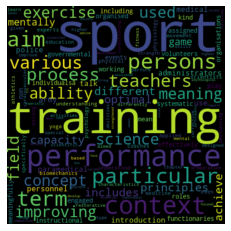

In [61]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.show()

In [62]:
#controlling number of words

In [63]:
wordcloud=WordCloud(width=480,height=480,max_words=3).generate(clean_data6)

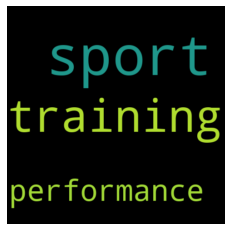

In [64]:
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.show()

In [65]:
wordcloud=WordCloud(width=480,height=480,colormap='Oranges_r').generate(clean_data6)

In [66]:
#plot the worldcloud image AWESOME IT IS

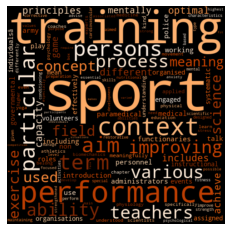

In [67]:
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.show()

In [68]:
#SENTIMENT ANALYSIS

In [69]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [70]:
import nltk

In [71]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\SURESH
[nltk_data]     A\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [72]:
analyser=SentimentIntensityAnalyzer()

In [73]:
scores=analyser.polarity_scores(clean_data6)

In [74]:
for key in sorted(scores):
    print('{0}:{1}, '.format(key, scores[key]),end="")

compound:0.9933, neg:0.018, neu:0.758, pos:0.224, 